
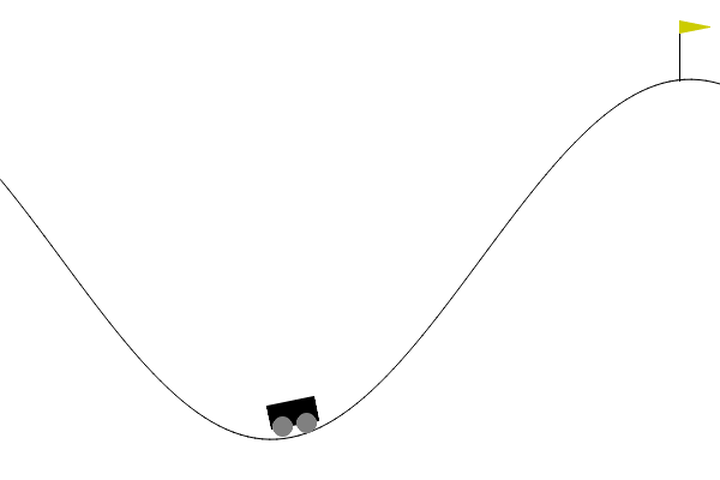

Saved HD GIF to mountain_car_hd.gif


In [9]:
import gymnasium as gym
import imageio
import base64
import numpy as np
from PIL import Image
from IPython.display import HTML, display

def record_high_res_gif(env_name="MountainCar-v0", steps=500, scale=1.2):
    """
    Runs a simulation, upscales the video for high resolution, 
    speeds up playback, and embeds it directly in the notebook.
    """
    
    # 1. Setup Environment
    env = gym.make(env_name, render_mode="rgb_array")
    state, info = env.reset()
    
    frames = []
    
    # 2. Run Simulation Loop
    for _ in range(steps):
        # Capture the raw frame (numpy array)
        raw_frame = env.render()
        
        # HIGH RES STEP: Convert to Image and Resize
        # We use PIL to scale the image up by the 'scale' factor (e.g., 2x)
        img = Image.fromarray(raw_frame)
        new_size = (int(img.width * scale), int(img.height * scale))
        high_res_img = img.resize(new_size, Image.Resampling.LANCZOS)
        
        # Convert back to numpy for imageio
        frames.append(np.array(high_res_img))
        
        # Action: Simple policy to accelerate (always push right)
        action = 2 
        
        # Step the environment
        state, reward, terminated, truncated, info = env.step(action)
        
        if terminated or truncated:
            state, info = env.reset()

    env.close()

    # 3. Save as GIF (FASTER PLAYBACK)
    gif_path = "mountain_car_hd.gif"
    # fps=60 makes it play faster and smoother than the default 30
    imageio.mimsave(gif_path, frames, fps=120, loop=0)

    # 4. Embed in Notebook (GitHub Compatible)
    with open(gif_path, "rb") as f:
        b64_data = base64.b64encode(f.read()).decode("ascii")

    # Display using HTML with a defined width to prevent it from being too huge
    html_tag = f'''
    <h3>High Resolution Simulation (Scaled {scale}x)</h3>
    <img src="data:image/gif;base64,{b64_data}" 
         alt="Mountain Car HD" 
         style="border: 2px solid #ccc; border-radius: 5px;" />
    '''
    
    display(HTML(html_tag))
    print(f"Saved HD GIF to {gif_path}")

# Run it
# scale=2.0 doubles the resolution. 
# You can increase steps if the car doesn't reach the top.
record_high_res_gif(steps=500, scale=1.2)